# Hi!

Today we're going to dive into the second type of Machine Learning, which is **unsupervised learning**. 
We're going to create algorithms that will learn from the data itself, without any need from us to label it. Let's go!

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import solutions
import time

from ipywidgets import interact, fixed
import ipywidgets as widgets

import cv2

np.random.seed(int(time.time()))
%matplotlib inline

## Use case 1: Clustering

There are many real-world cases, when a need arises to divide a dataset into various subgroups. Be it people, products or website articles. Sometimes there may not be any obvious ways to achieve that - fortunately, there are algorithms that can figure that out for us!

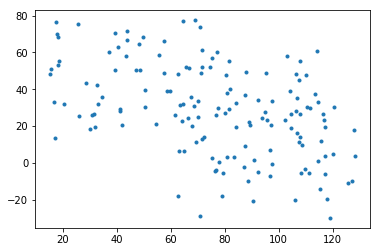

In [2]:
points = solutions.generate_mess(point_range=100)
X = points[:,0]
Y = points[:,1]

plt.scatter(X,Y, marker='.')
plt.show()

### K-means algorithm

The only thing we have to choose is the number of the clusters we want to achieve.

In [3]:
num_centroids = 3

* We initialize K cluster 'centroids' **randomly** in the space of the examples (represented by their features).
$$centroids = \mu_1, \mu_2, ... \mu_k$$
* repeatedly:
    * add every example to the cluster whose centroid it's the closest to
    * every centroid is reassigned as the mean of the examples in its' cluster

You can repeat the above steps either for a given number of steps or until the algorithm converges (the centroids move slower and slower) 

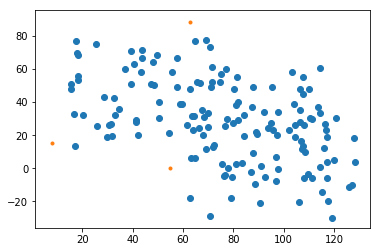

In [4]:
centroids = np.random.rand(num_centroids, 2) * 100 
plt.scatter(X, Y)
plt.scatter(centroids[:,0], centroids[:,1], marker='.')
plt.show()

In [5]:
def k_means_iteration(centroids, X, Y):
    # implement me!
    # return new positions of centroids

SyntaxError: unexpected EOF while parsing (<ipython-input-5-cd4393ed76cd>, line 3)

In [6]:
k_means_iteration = solutions.k_means_iteration

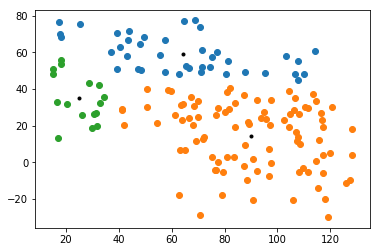

In [7]:
centroids, clusters = k_means_iteration(centroids, points)
for c in clusters:
    plt.scatter(X[c], Y[c])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='.')
plt.show()


In [8]:
num_centroids = 5
centroids = np.random.rand(num_centroids, 2) * 100
interact(solutions.demonstrate_k_means,
        k_means_iter=fixed(k_means_iteration),
        datapoints=fixed(points),
        centroids=fixed(centroids),
        num_iterations=widgets.IntSlider(min=0,max=20,step=1,value=0)
        )

interactive(children=(IntSlider(value=0, description='num_iterations', max=20), Output()), _dom_classes=('widget-interact',))

<function solutions.demonstrate_k_means>

## Use Case 2: Image compression

Could we use the same method to find a number of RGB values that can be used to represent the image?
<img src="img/phoenix.jpg" alt="Name a better comic, I'll wait" style="width: 200px;"/>



(334, 220, 3)


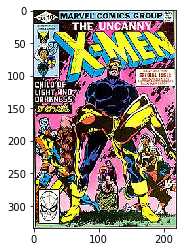

In [14]:
img = cv2.imread('img/phoenix.jpg')
print(img.shape)
# plt changes the rgb channels order... 
plt.imshow(img[:,:,[2,1,0]])

In [15]:
#number of colours we want to achieve
num_centroids = 8
centroids = np.random.rand(num_centroids, 3) * 255

In [16]:
interact(solutions.k_means_img_compression,
        k_means_iter=fixed(k_means_iteration),
        image=fixed(img),
        centroids=fixed(centroids),
        num_iterations=widgets.IntSlider(min=0,max=20,step=1,value=0)
        )

interactive(children=(IntSlider(value=0, description='num_iterations', max=20), Output()), _dom_classes=('widget-interact',))

<function solutions.k_means_img_compression>